## Author : Amisha Gupta

## GRIP - The Sparks Foundation

### Data Science and Business Analytics Internship 

### Task 1 - Predict the score of student based on the number of study hours

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset 

In [34]:
dataset = pd.read_csv('student_scores.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Exploring the Dataset

In [35]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### There are no null values in our dataset.

In [15]:
dataset.shape

(25, 2)

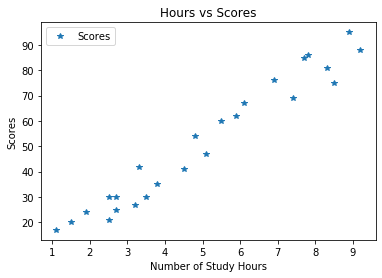

In [28]:
dataset.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Scores')
plt.xlabel('Number of Study Hours')
plt.ylabel('Scores')
plt.show()

#### This shows that score is linearly dependent on the number of study hours. 

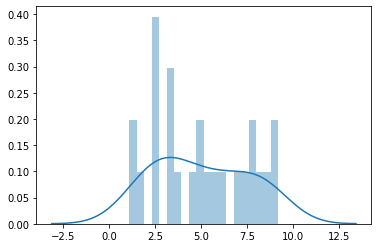

In [18]:
import seaborn as sns
sns.distplot(X,bins=20)

##### Since the data is also continuous, there aren't any outliers.

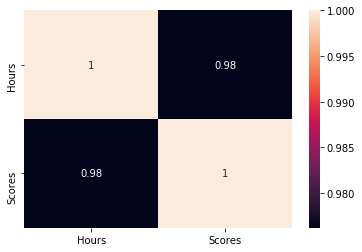

In [24]:
sns.heatmap(dataset.corr(), xticklabels = dataset.corr().columns, yticklabels = dataset.corr().columns, annot = True)

## Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [39]:
y_pred = regressor.predict(X_test)

In [51]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[16.88414476 20.        ]
 [33.73226078 27.        ]
 [75.357018   69.        ]
 [26.79480124 30.        ]
 [60.49103328 62.        ]]


## Visualising the Training set results

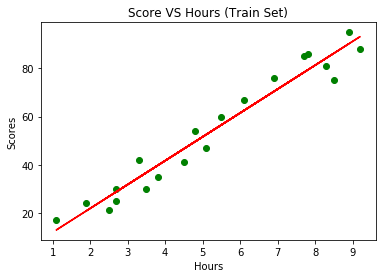

In [58]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color= 'red')
plt.title('Score VS Hours (Train Set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Visualising the Test set results 

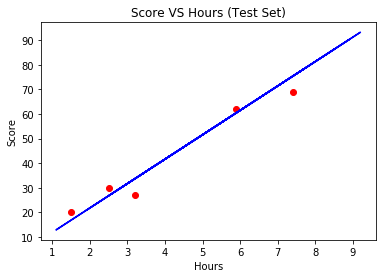

In [41]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color= 'blue')
plt.title('Score VS Hours (Test Set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

## Predicted score if a student studies for 9.25 hrs/day

In [42]:
print(regressor.predict([[9.25]]))

[93.69173249]


<h3> <i>So the predicted score is </i> <strong>93.69</strong> </h3>

## Evaluating the model 

<strong> MAE = True values – Predicted values </strong><br>
    MAE takes the <strong>average</strong> of this error from every sample in a dataset and gives the output.

In [43]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
